## Select Subset of Bug Reports for Empirical Study

For the empirical study, made for the creation of the oracle matrix by volunteers, we make a selection of bug reports to filter the most relevant for our analysis and improve the power and improve our conclusions about the studied subject.

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

### Load Dataset

In [2]:
bugreports_final = pd.read_csv('../data/mozilla_firefox_v2/firefoxDataset/docs_english/BR/bugreports_final.csv')

In [6]:
bugreports_final.head()

,Bug_Number,Summary,Platform,Component,Version,Creation_Time,Whiteboard,QA_Whiteboard,First_Comment_Text,First_Comment_Creation_Time,Status,Product,Priority,Resolution,Severity,Is_Confirmed,br_name,br_desc
0,506297,Livemarks with null site/feed uris cause sync ...,All,Sync,unspecified,2009-07-24T17:08:43Z,NaN,NaN,2009-07-24 09:54:28 FaultTolerance D...,2009-07-24T17:08:43Z,RESOLVED,Firefox,--,FIXED,normal,True,BR_506297_SRC,506297 Livemarks with null site/feed uris caus...
1,506338,Enhance Crash Recovery to better help the user,All,Session Restore,Trunk,2009-07-24T19:17:21Z,[crashkill][crashkill-metrics],NaN,When our users crash they are pretty much in t...,2009-07-24T19:17:21Z,NEW,Firefox,--,NaN,enhancement,True,BR_506338_SRC,506338 Enhance Crash Recovery to better help t...
2,506507,Dragging multiple bookmarks in the bookmarks s...,x86,Bookmarks & History,Trunk,2009-07-26T06:16:02Z,NaN,NaN,User-Agent: Mozilla/5.0 (Windows; U; Win...,2009-07-26T06:16:02Z,RESOLVED,Firefox,--,WORKSFORME,normal,True,BR_506507_SRC,506507 Dragging multiple bookmarks in the book...
3,506550,Unreliable Back Button navigating nytimes.com,x86,Extension Compatibility,3.5 Branch,2009-07-26T16:12:10Z,[caused by adblock plus][platform-rel-NYTimes],NaN,User-Agent: Mozilla/5.0 (Windows; U; Win...,2009-07-26T16:12:10Z,RESOLVED,Firefox,--,FIXED,normal,False,BR_506550_SRC,506550 Unreliable Back Button navigating nytim...
4,506575,ALT + F4 when dropdown of autocomplete is open...,x86,Address Bar,3.5 Branch,2009-07-26T20:14:54Z,NaN,NaN,Pressing ALT + F4 when the autocomplete dropdo...,2009-07-26T20:14:54Z,NEW,Firefox,P5,NaN,normal,True,BR_506575_SRC,506575 ALT + F4 when dropdown of autocomplete ...


In [7]:
brs_versions = ['48 Branch', '49 Branch', '50 Branch', '51 Branch']
brs_status = ['NEW','RESOLVED','VERIFIED','REOPENED','ASSIGNED']
brs_priority = ['P1', 'P2', 'P3']
brs_resolutions = ['FIXED']
brs_severities = ['major', 'normal', 'blocker', 'critical','enhancement']
brs_isconfirmed = [True]
selected_bugs = bugreports_final[(bugreports_final.Version.isin(brs_versions)) &
                                 (bugreports_final.Status.isin(brs_status)) &
                                 (bugreports_final.Priority.isin(brs_priority)) &
                                 (bugreports_final.Resolution.isin(brs_resolutions)) &
                                 (bugreports_final.Severity.isin(brs_severities)) &
                                 (bugreports_final.Is_Confirmed.isin(brs_isconfirmed))
                                ]
print(selected_bugs.shape)

(94, 18)


#### Distribution of Length of First Comment

(array([26., 26., 21., 13.,  2.,  2.,  2.,  0.,  1.,  1.]),
 array([  78. ,  344.9,  611.8,  878.7, 1145.6, 1412.5, 1679.4, 1946.3,
        2213.2, 2480.1, 2747. ]),
 <a list of 10 Patch objects>)

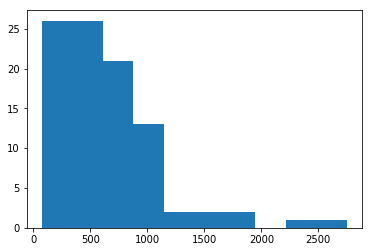

In [9]:
plt.hist(selected_bugs.First_Comment_Text.apply(lambda x : len(x)))

49 Branch    13
51 Branch    10
50 Branch     9
48 Branch     7
Name: Version, dtype: int64


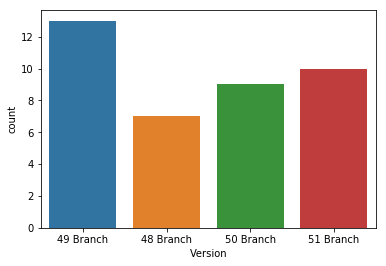

In [47]:
print(selected_bugs.Version.value_counts())
display(sns.countplot(selected_bugs.Version))

RESOLVED    39
Name: Status, dtype: int64


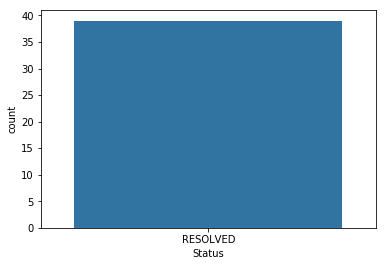

In [46]:
print(selected_bugs.Status.value_counts())
display(sns.countplot(selected_bugs.Status))

P1    14
P2    13
P3    12
Name: Priority, dtype: int64


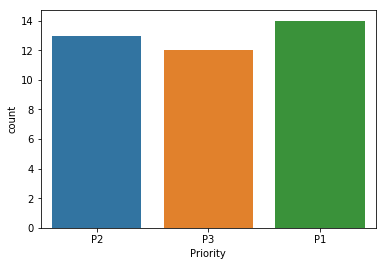

In [45]:
print(selected_bugs.Priority.value_counts())
display(sns.countplot(selected_bugs.Priority))

FIXED    39
Name: Resolution, dtype: int64


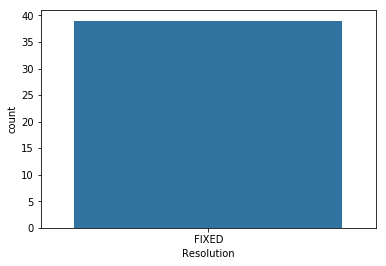

In [44]:
print(selected_bugs.Resolution.value_counts())
display(sns.countplot(selected_bugs.Resolution))

normal    38
major      1
Name: Severity, dtype: int64


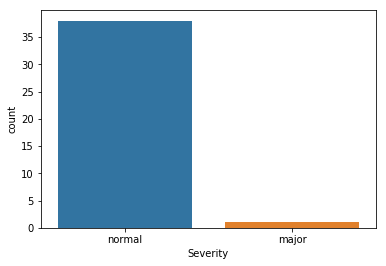

In [43]:
print(selected_bugs.Severity.value_counts())
display(sns.countplot(selected_bugs.Severity))

True    39
Name: Is_Confirmed, dtype: int64


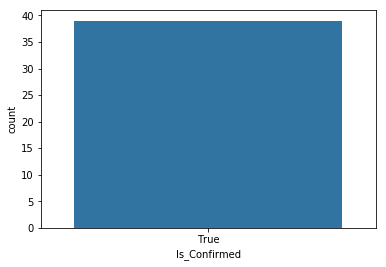

In [50]:
print(selected_bugs.Is_Confirmed.value_counts())
display(sns.countplot(selected_bugs.Is_Confirmed))

In [53]:
cols = ['Bug_Number','Summary','Version','First_Comment_Text','Priority']
selected_bugs[cols].head(40)

,Bug_Number,Summary,Version,First_Comment_Text,Priority
9192,1181835,Provide a UI for migrating users' add-ons to w...,49 Branch,We're still not exactly sure how this would wo...,P2
11229,1267480,Intermittent browser/components/preferences/in...,48 Branch,https://treeherder.mozilla.org/logviewer.html#...,P3
11232,1267501,New Private Browsing start-page overflows off ...,48 Branch,STR: 1. Open a new private browsing window. ...,P1
11375,1270274,Intermittent browser_share.jsuncaught exceptio...,49 Branch,https://treeherder.mozilla.org/logviewer.html#...,P3
11414,1270983,Intermittent browser_contextmenu.jsTest timed ...,49 Branch,https://treeherder.mozilla.org/logviewer.html#...,P3
11452,1271607,The new window's size is modified if the last ...,48 Branch,Created attachment 8750748 Recording #1.mp4 M...,P1
11695,1276120,Autocomplete suggestions just don't go away af...,48 Branch,Created attachment 8757112 screenshot 1 - Auto...,P2
11824,1278388,Permafailing on the change to firefox50: brows...,49 Branch,https://treeherder.mozilla.org/logviewer.html#...,P1
12084,1281190,Keep collecting telemetry for Permissions Noti...,49 Branch,POPUP_NOTIFICATION_STATS is expiring soon [1]....,P2
12250,1283542,Automigration from Chrome is broken,50 Branch,The code and tests expect to deal with profile...,P2
